In [1]:
import userbinance
import matplotlib.pyplot as plt
import userbinance
import matplotlib.pyplot as plt
import pandas as pd
from mplfinance.original_flavor import candlestick_ohlc
from binance.client import Client
import numpy as np
from matplotlib.animation import FuncAnimation

In [2]:
# Inicializar el cliente de Binance
client = Client(userbinance.API_KEY, userbinance.API_SECRET, tld='com')

# Parámetros
nl = 100
moneda_base = 'USDT'
moneda_negociada = 'ETH'
simbolo = moneda_negociada + moneda_base
intervalo = Client.KLINE_INTERVAL_1HOUR

In [3]:
# Función para obtener y procesar los datos
def obtener_y_procesar_datos():
    klines = np.array(client.get_klines(symbol=simbolo, interval=intervalo, limit=nl)).astype(np.float64)
    df = pd.DataFrame(klines[:, :5], columns=['Fecha', 'Apertura', 'Máximo', 'Mínimo', 'Cierre'])
    df['Fecha'] = np.round(df['Fecha'], 5)
    return df

In [4]:
# Función para actualizar el gráfico
def actualizar_grafico(i):
    df = obtener_y_procesar_datos()

    x = [df['Fecha'].iloc[0], df['Fecha'].iloc[-1]]
    xcord = df['Fecha'].iloc[0]

    # Limpiar el gráfico previo
    ax.clear()

    # Graficar los nuevos datos
    candlestick_ohlc(ax, df.values, width=2000000, colorup='green', colordown='red')

    ax.set_title('ETHUSDT')

    # Obtener el último precio de cierre
    ultimo_cierre = df['Cierre'].iloc[-1]

    # Dibujar una línea vertical en el último precio de cierre
    ax.axhline(ultimo_cierre, color='black', linestyle='-')

    # Dibujar una línea vertical en el último precio de cierre
    ax.axhline(1600, color='yellow', linestyle='-')

    # Mostrar el valor del último precio de cierre
    ax.text(xcord, ultimo_cierre, ultimo_cierre, ha='left', va='bottom')

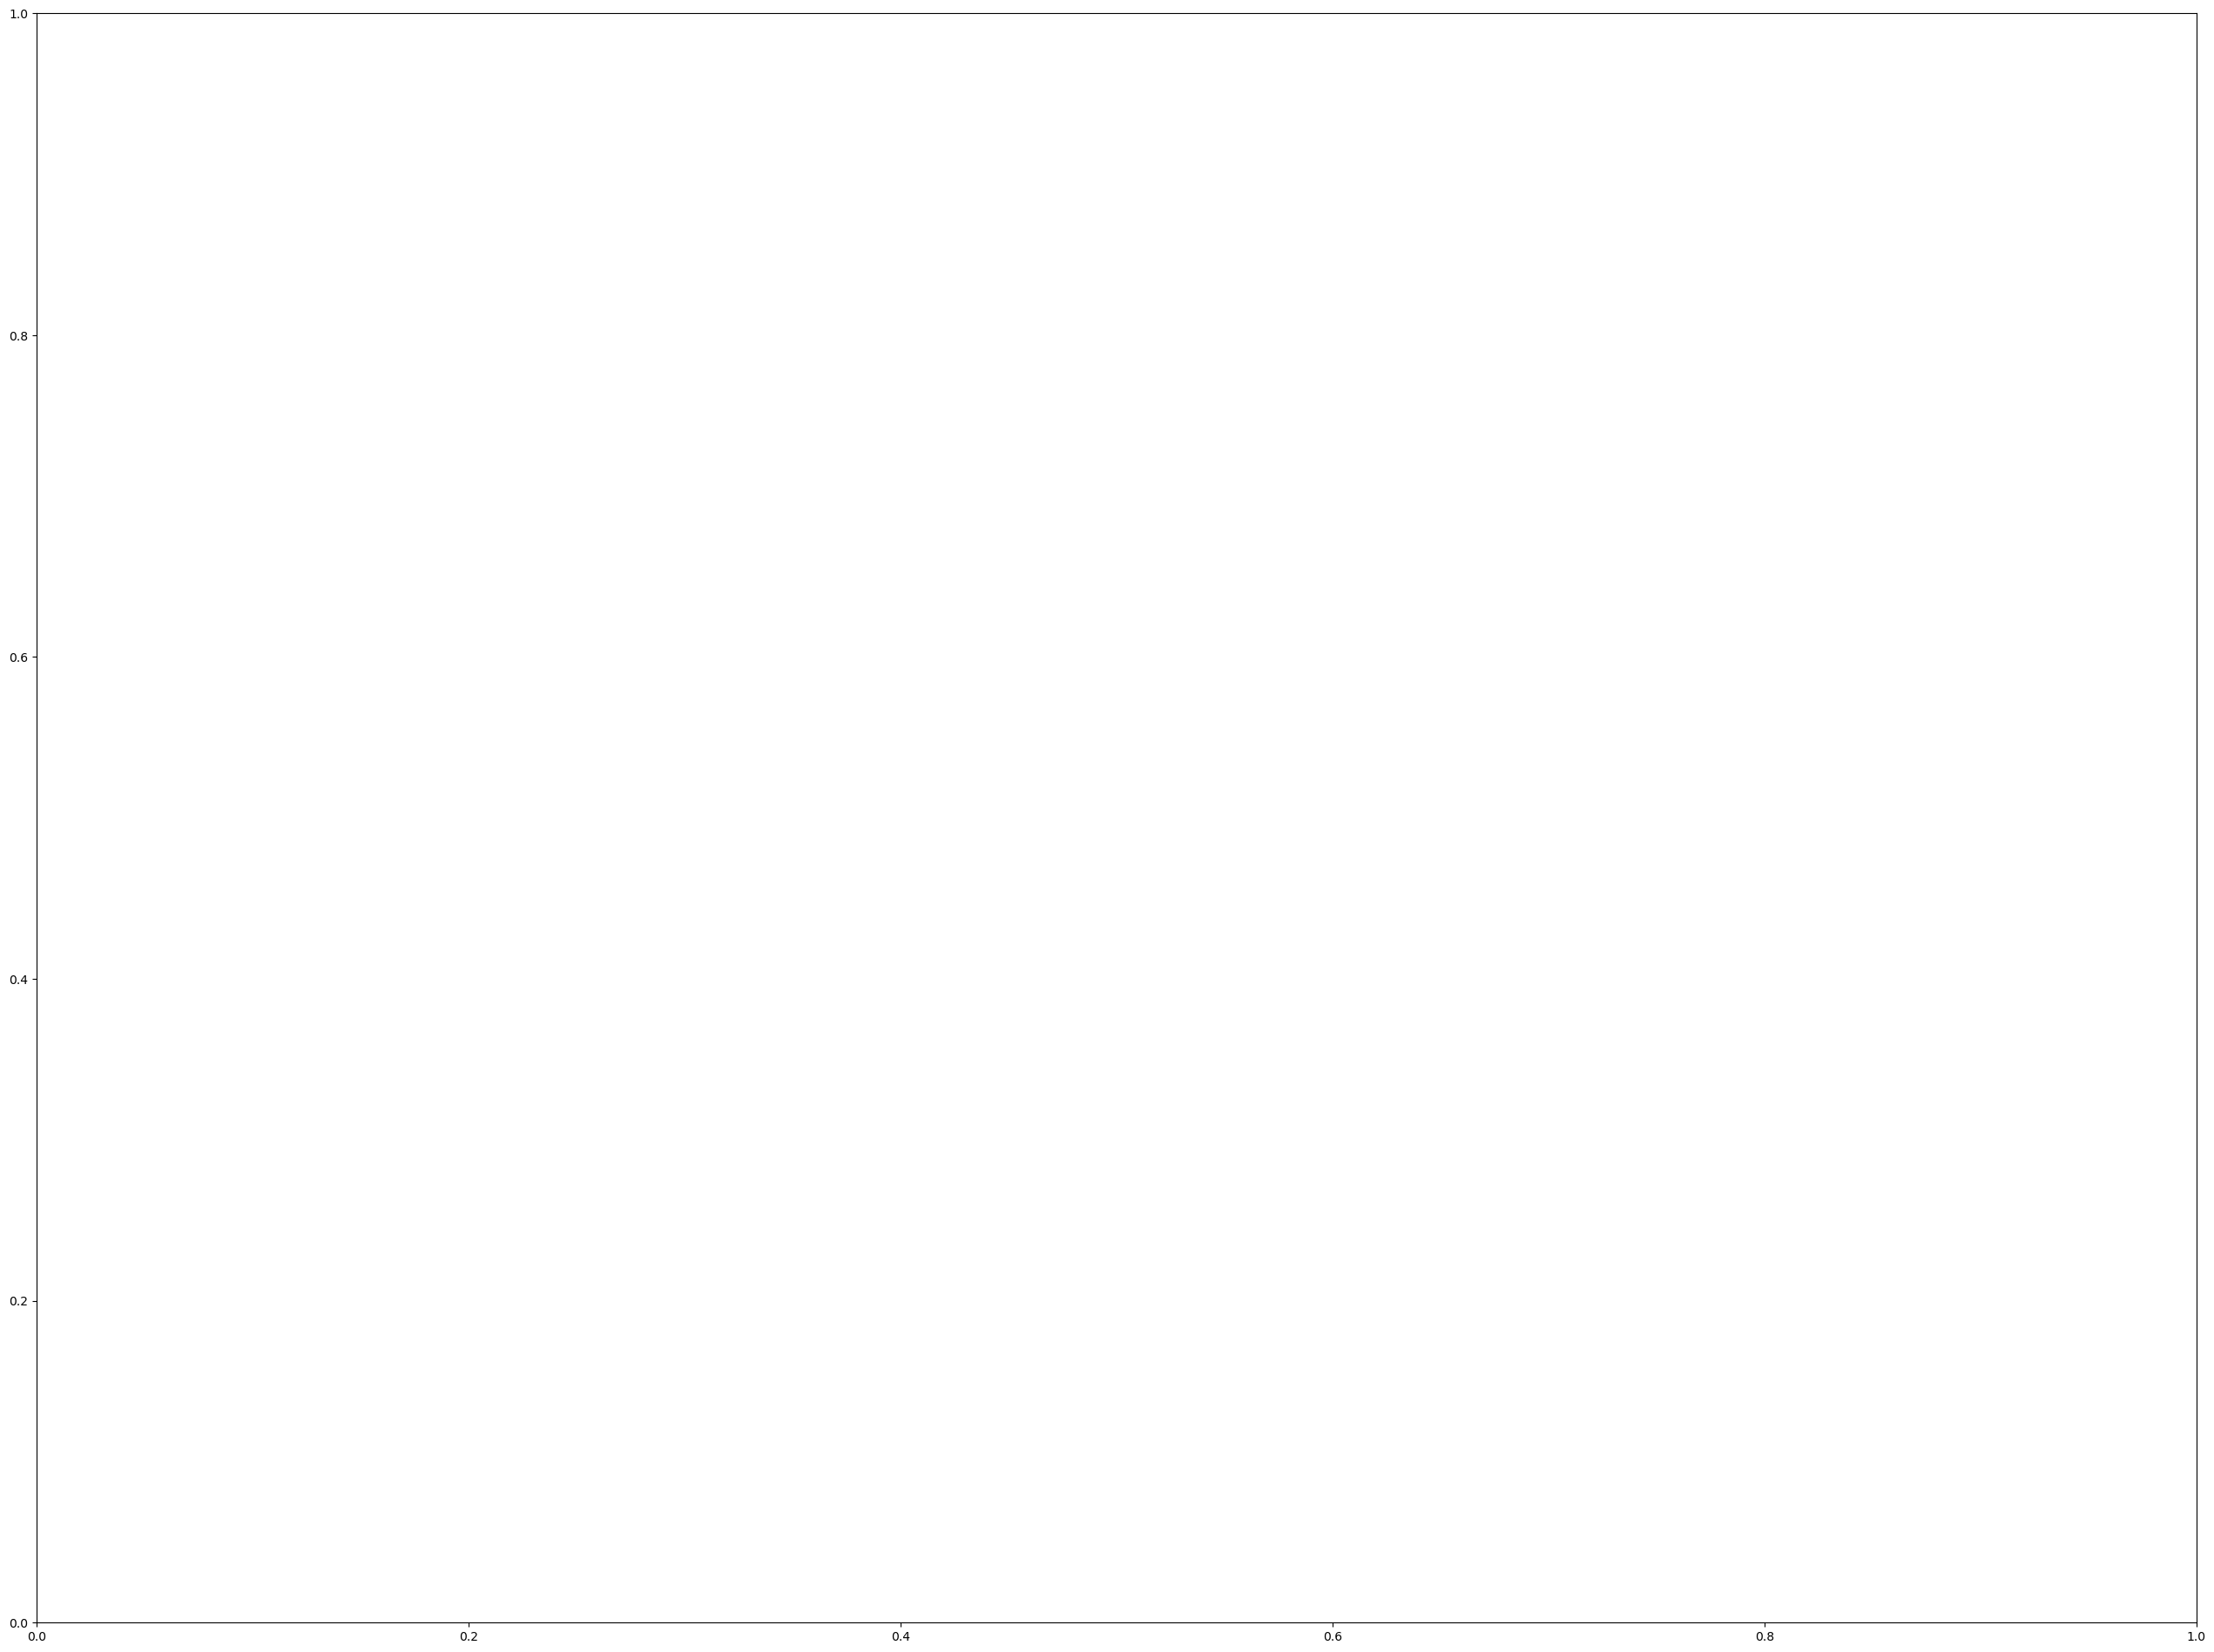

In [5]:
# Configurar la figura y el eje
fig, ax = plt.subplots(figsize=(32, 24))

# Configurar la animación
ani = FuncAnimation(fig, actualizar_grafico, interval=100, save_count=nl)

plt.show()